In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Getting column names from measurement table
inspector = inspect(engine)
inspector.get_table_names()
m_columns = inspector.get_columns('measurement')
for column in m_columns:
    print(column["name"], column["type"])

# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23')

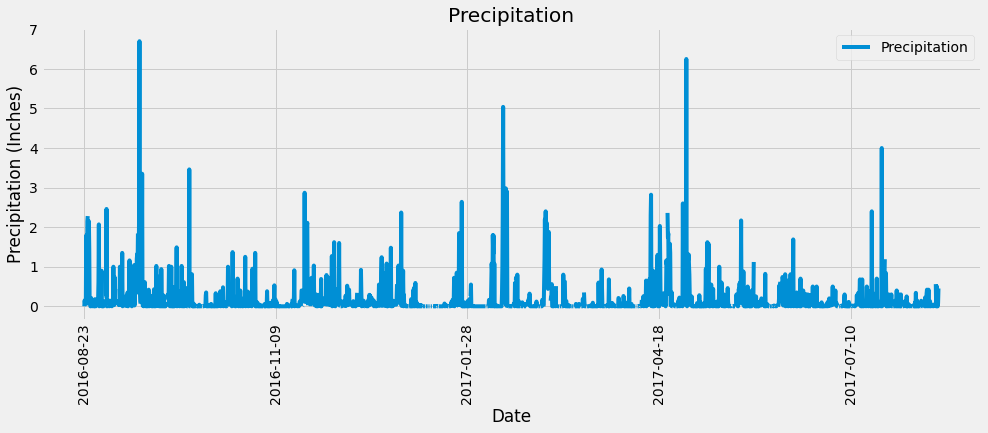

<Figure size 432x288 with 0 Axes>

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_prior

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= one_year_prior).\
            order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(precip, columns=["Date", "Precipitation"])
prec_df = prec_df.set_index('Date')

# Sort the dataframe by date
prec_sorted = prec_df.sort_values(by=['Date'])
prec_sorted
# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(title="Precipitation", figsize=(15,5))
plt.xticks(rotation="vertical")
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.show()
plt.savefig("Images/precipitation.png")



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
describe_df = prec_df.describe()
describe_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
#Getting column names from station table
inspector = inspect(engine)
inspector.get_table_names()
s_columns = inspector.get_columns('station')
for column in s_columns:
    print(column["name"], column["type"])
    
station_count = session.query(station.station).distinct().count()
station_count

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


9

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [func.round(func.min(measurement.tobs),2),
         func.round(func.max(measurement.tobs),2),
         func.round(func.avg(measurement.tobs),2)]

min_max_avg = session.query(*select).\
    filter(measurement.station == "USC00519281").all()
min_max_avg

[(54.0, 85.0, 71.66)]

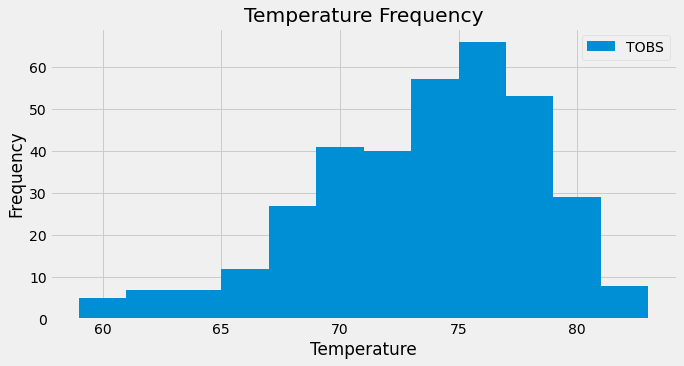

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_12 = session.query(measurement.tobs).\
    filter(measurement.date >= one_year_prior).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

tobs_12

tobs_df = pd.DataFrame(tobs_12, columns=["TOBS"])
tobs_df

tobs_df.plot.hist(bins=12, title = "Temperature Frequency", figsize = (10,5))
plt.xlabel("Temperature")
plt.savefig("Images/temperature_frequency.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()